# $\mathsf{CosmoFlow}$ Possible Issues

(and how to solve them)

<div class="alert alert-block alert-info"> Please reach out to the developers if you have questions! Your questions and feedback are very valuable to us. </div>

In [1]:
# Import the standard Python packages
import numpy as np
import matplotlib.pyplot as plt

# Import CosmoFlow modules (they must be located in the same parent folder as this notebook)
from Parameters import parameters
from Theory import theory
from Solver import solver

In [2]:
# Define the numerical i\epsilon prescription
def adiabatic(N_load, DeltaN):
    return (np.tanh((N_load + DeltaN - 1)/0.1) + 1)/2

## Relative Error

In [3]:
def relative_error(Rtol):
    n = 10000 # Number of points for the parameter evaluation
    N_load = np.linspace(-10, 20, n) # Time grid array in e-folds for the parameters
    DeltaN = 4 # Number of e-folds before horizon crossing

    # Theory 
    g_load = 1 * np.ones(n) * adiabatic(N_load, DeltaN) # Cubic coupling constant
    H_load = np.ones(n) # Hubble scale

    # Load the parameters and define continuous functions
    param = parameters(N_load, H_load, g_load) # Load the class parameters
    interpolated = param.output() # Define list with continuous parameters

    # Numerical parameters
    Nspan = np.linspace(-10, 20, 1000) # Time span in e-folds for the numerical integration
    Nfield = 1 # Number of fields
    Rtol, Atol = Rtol, 1e-180 # Relative and absolute tolerance of the integrator
    N_exit = 0 # Horizon exit for a mode
    Ni, Nf = N_exit - DeltaN, 10 # Sets initial and final time for integration
    N = np.linspace(Ni, Nf, 1000) # Define the time array for output correlators

    # Initialise the integrator
    theo = theory(N = Nspan, Nfield = Nfield, interpolated = interpolated)
    
    # Kinematic configuration
    k = theo.k_mode(N_exit) # Mode corresponding to N = 0 horizon exit
    k1, k2, k3 = k, k, k # Kinematic configuration for 3-pt function (here equilateral)
    
    # Solve flow equations
    s = solver(Nspan = N, Nfield = Nfield, interpolated = interpolated, Rtol = Rtol, Atol = Atol)
    f = s.f_solution(k1 = k1, k2 = k2, k3 = k3)
    
    return N, f

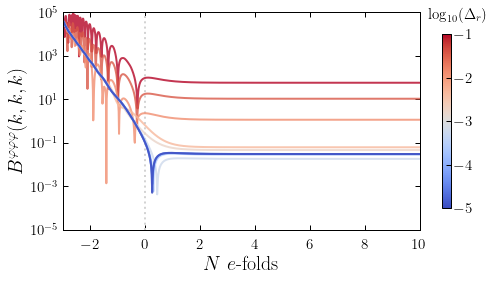

In [4]:
import matplotlib
from IPython.display import set_matplotlib_formats

# Import figure style
plt.style.use('sty2.mplstyle')

# Define figure
fig = plt.figure()
ax = fig.add_subplot()

# Axis limits
ax.set_xlim([-3, 10])
ax.set_ylim([1e-5, 1e5])

# Rtol range (in log scale)
Rtol_min = -5
Rtol_max = -1
Rtol_number = 10
Rtol = np.logspace(Rtol_min, Rtol_max, Rtol_number)

#Initialize min and max value for Rtol
norm = matplotlib.colors.Normalize(vmin = (Rtol_min), vmax = (Rtol_max))
#Choose a colormap
c_m = matplotlib.cm.coolwarm
#Initialize the colorbar
s_m = matplotlib.cm.ScalarMappable(cmap = c_m, norm = norm)
s_m.set_array([])
cb = plt.colorbar(s_m, shrink = 0.8)
#Colorbar label with position
cb.set_label("$\log_{10}(\\Delta_r)$", y = 1.15, rotation = 0, labelpad = -16, fontsize = 15)

# Horizon crossing
N_exit = 0
ax.axvline(x = N_exit, ls = "dotted", color = "lightgray")

#Loop on Rtol values
for i in range(Rtol_number - 1, -1, -1):
    N, f = relative_error(Rtol[i])
    ax.semilogy(N, np.abs(f[6][0, 0, 0]), color = s_m.to_rgba(np.log10(Rtol[i])), alpha = 0.8, ls = "-")

# Labels
ax.set_xlabel(r"$N$ $e$-folds")
ax.set_ylabel(r"$B^{\varphi\varphi\varphi}(k, k, k)$")

# Save figure
plt.savefig('Masslessdphi3_RelativeError.pdf', bbox_inches = "tight")

## Time discretisation

In [5]:
def time_discretisation(n_disc, iepsilon):
    n_disc = int(n_disc)
    n = n_disc # Number of points for the parameter evaluation
    N_load = np.linspace(-10, 20, n) # Time grid array in e-folds for the parameters
    DeltaN = 4 # Number of e-folds before horizon crossing

    # Theory 
    if iepsilon:
        g_load = 1 * np.ones(n) * adiabatic(N_load, DeltaN) # Cubic coupling constant
        H_load = np.ones(n) # Hubble scale
    else: # Without iepsilon prescription
        g_load = 1 * np.ones(n)
        H_load = np.ones(n)

    # Load the parameters and define continuous functions
    param = parameters(N_load, H_load, g_load) # Load the class parameters
    interpolated = param.output() # Define list with continuous parameters

    # Numerical parameters
    Nspan = np.linspace(-10, 20, 1000) # Time span in e-folds for the numerical integration
    Nfield = 1 # Number of fields
    Rtol, Atol = 1e-3, 1e-180 # Relative and absolute tolerance of the integrator
    N_exit = 0 # Horizon exit for a mode
    Ni, Nf = N_exit - DeltaN, 10 # Sets initial and final time for integration
    N = np.linspace(Ni, Nf, 1000) # Define the time array for output correlators

    # Initialise the integrator
    theo = theory(N = Nspan, Nfield = Nfield, interpolated = interpolated)
    
    # Kinematic configuration
    k = theo.k_mode(N_exit) # Mode corresponding to N = 0 horizon exit
    k1, k2, k3 = k, k, k # Kinematic configuration for 3-pt function (here equilateral)
    
    # Solve flow equations
    s = solver(Nspan = N, Nfield = Nfield, interpolated = interpolated, Rtol = Rtol, Atol = Atol)
    f = s.f_solution(k1 = k1, k2 = k2, k3 = k3)
    
    return N, f

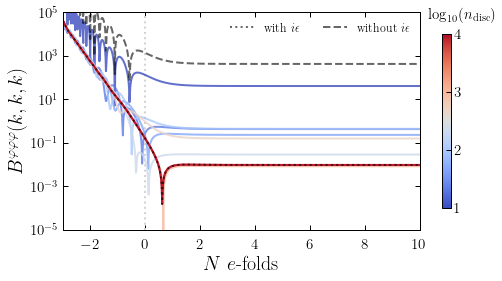

In [6]:
import matplotlib
from IPython.display import set_matplotlib_formats

# Import figure style
plt.style.use('sty2.mplstyle')

# Define figure
fig = plt.figure()
ax = fig.add_subplot()

# Axis limits
ax.set_xlim([-3, 10])
ax.set_ylim([1e-5, 1e5])

# n_disc range (in log scale)
n_disc_min = 1
n_disc_max = 4
n_disc_number = 10
n_disc = np.logspace(n_disc_min, n_disc_max, n_disc_number)

#Initialize min and max value for Rtol
norm = matplotlib.colors.Normalize(vmin = n_disc_min, vmax = n_disc_max)
#Choose a colormap
c_m = matplotlib.cm.coolwarm
#Initialize the colorbar
s_m = matplotlib.cm.ScalarMappable(cmap = c_m, norm = norm)
s_m.set_array([])
cb = plt.colorbar(s_m, shrink = 0.8)
#Colorbar label with position
cb.set_label("$\log_{10}(n_{\mathrm{disc}})$", y = 1.15, rotation = 0, labelpad = 0, fontsize = 15)

# Horizon crossing
N_exit = 0
ax.axvline(x = N_exit, ls = "dotted", color = "lightgray")

#Loop on n_disc values
for i in range(n_disc_number):
    N, f = time_discretisation(n_disc[i], iepsilon = True)
    ax.semilogy(N, np.abs(f[6][0, 0, 0]), color = s_m.to_rgba(np.log10(n_disc[i])), alpha = 0.8, ls = "-")
    
N_ieps, f_ieps = time_discretisation(10000, iepsilon = True)
N_noieps, f_noieps = time_discretisation(10000, iepsilon = False)
ax.semilogy(N, np.abs(f_ieps[6][0, 0, 0]), color = "k", alpha = 0.6, ls = "dotted", label = "with $i\epsilon$")
ax.semilogy(N, np.abs(f_noieps[6][0, 0, 0]), color = "k", alpha = 0.6, ls = "--", label = "without $i\epsilon$")

# Labels
ax.set_xlabel(r"$N$ $e$-folds")
ax.set_ylabel(r"$B^{\varphi\varphi\varphi}(k, k, k)$")
ax.legend(ncol = 2, loc = 1)

# Save figure
plt.savefig('Masslessdphi3_TimeDiscretisation.pdf', bbox_inches = "tight")

## Massless e-folds

In [7]:
def massless_efolds(DeltaN):
    n = 10000 # Number of points for the parameter evaluation
    N_load = np.linspace(-10, 20, n) # Time grid array in e-folds for the parameters

    # Theory 
    g_load = 1 * np.ones(n) * adiabatic(N_load, DeltaN) # Cubic coupling constant
    H_load = np.ones(n) # Hubble scale

    # Load the parameters and define continuous functions
    param = parameters(N_load, H_load, g_load) # Load the class parameters
    interpolated = param.output() # Define list with continuous parameters

    # Numerical parameters
    Nspan = np.linspace(-10, 20, 1000) # Time span in e-folds for the numerical integration
    Nfield = 1 # Number of fields
    Rtol, Atol = 1e-3, 1e-180 # Relative and absolute tolerance of the integrator
    N_exit = 0 # Horizon exit for a mode
    Ni, Nf = N_exit - DeltaN, 10 # Sets initial and final time for integration
    N = np.linspace(Ni, Nf, 1000) # Define the time array for output correlators

    # Initialise the integrator
    theo = theory(N = Nspan, Nfield = Nfield, interpolated = interpolated)
    
    # Kinematic configuration
    k = theo.k_mode(N_exit) # Mode corresponding to N = 0 horizon exit
    k1, k2, k3 = k, k, k # Kinematic configuration for 3-pt function (here equilateral)
    
    # Solve flow equations
    s = solver(Nspan = N, Nfield = Nfield, interpolated = interpolated, Rtol = Rtol, Atol = Atol)
    f = s.f_solution(k1 = k1, k2 = k2, k3 = k3)
    
    return N, f

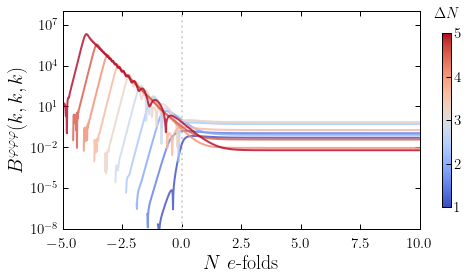

In [8]:
import matplotlib
from IPython.display import set_matplotlib_formats

# Import figure style
plt.style.use('sty2.mplstyle')

# Define figure
fig = plt.figure()
ax = fig.add_subplot()

# Axis limits
ax.set_xlim([-5, 10])
ax.set_ylim([1e-8, 1e8])

# n_disc range
DeltaN_min = 1
DeltaN_max = 5
DeltaN_number = 10
DeltaN = np.linspace(DeltaN_min, DeltaN_max, DeltaN_number)

#Initialize min and max value for Rtol
norm = matplotlib.colors.Normalize(vmin = DeltaN_min, vmax = DeltaN_max)
#Choose a colormap
c_m = matplotlib.cm.coolwarm
#Initialize the colorbar
s_m = matplotlib.cm.ScalarMappable(cmap = c_m, norm = norm)
s_m.set_array([])
cb = plt.colorbar(s_m, shrink = 0.8)
#Colorbar label with position
cb.set_label("$\Delta N$", y = 1.15, rotation = 0, labelpad = -16, fontsize = 15)

# Horizon crossing
N_exit = 0
ax.axvline(x = N_exit, ls = "dotted", color = "lightgray")

#Loop on DeltaN values
for i in range(DeltaN_number):
    N, f = massless_efolds(DeltaN[i])
    ax.semilogy(N, np.abs(f[6][0, 0, 0]), color = s_m.to_rgba(DeltaN[i]), alpha = 0.8, ls = "-")

# Labels
ax.set_xlabel(r"$N$ $e$-folds")
ax.set_ylabel(r"$B^{\varphi\varphi\varphi}(k, k, k)$")

# Save figure
plt.savefig('Masslessdphi3_MasslessEfolds.pdf', bbox_inches = "tight")